 <center><h1>  Introdaction</h1> <center> 

This is Time series modeles to analysis a data of Saudi Arabia Refineries Co.(SARCO) company from a tadawul platform to predict the closing prices of this company in the stock market.


The dataset was obtained from the Kaggel website:
https://www.kaggle.com/salwaalzahrani/saudi-stock-exchange-tadawul#Tadawul_stcks.csv


## Import all required package

In [64]:
from  sklearn import metrics 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
np.set_printoptions(precision=4)
sns.set(font_scale=1.5)
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa import stattools
from statsmodels.tsa.arima_model import ARIMA, ARMA

In [2]:
def autocorr_plots(y, lags=None):
    fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
    plot_acf(y, lags=lags, ax=ax[0])
    plot_pacf(y, lags=lags, ax=ax[1])
    return fig, ax

### Read and Describe data

In [3]:
data = pd.read_csv('data/Tadawul_stcks.csv')

In [4]:
data.shape

(593819, 14)

In [5]:
data.head()

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
0,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-05,35.55,35.85,34.90,34.90,-0.40,-1.13,436609.0,15399073.50,804.0
1,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-04,34.70,35.65,34.50,35.30,0.25,0.71,737624.0,25981391.35,1268.0
2,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-03,34.70,35.15,34.70,35.05,1.05,3.09,489831.0,17116413.40,854.0
3,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-02,35.20,35.65,34.00,34.00,-0.55,-1.59,736157.0,25858700.60,1242.0
4,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-03-01,35.35,35.60,34.25,34.55,-2.05,-5.60,738685.0,25747967.55,1625.0


In [6]:
#sort data
data = data.sort_values('date')

In [7]:
#check data type
data.dtypes

symbol              int64
name               object
trading_name       object
sectoer            object
date               object
open              float64
high              float64
low               float64
close             float64
change            float64
perc_Change       float64
volume_traded     float64
value_traded      float64
no_trades         float64
dtype: object

In [8]:
#subset data of SARCO company  
data=data.loc[data.symbol== 2030]

In [9]:
data.shape

(4458, 14)

In [10]:
# Create a datetime index
data['date'] = pd.to_datetime(data.date)
data.set_index('date', inplace=True, drop=True)
data.head()

,symbol,name,trading_name,sectoer,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
date,,,,,,,,,,,,,
2002-01-23,2030,Saudi Arabia Refineries Co.,SARCO,Energy,6.3,6.3,6.3,6.3,6.3,0.00,6975.0,43089.0,4.0
2002-03-06,2030,Saudi Arabia Refineries Co.,SARCO,Energy,6.3,5.8,5.8,5.8,-0.5,-7.94,37500.0,218500.0,1.0
2002-03-09,2030,Saudi Arabia Refineries Co.,SARCO,Energy,5.8,NaN,NaN,5.8,0.0,0.00,75.0,435.0,1.0
2002-03-11,2030,Saudi Arabia Refineries Co.,SARCO,Energy,5.8,5.9,5.9,5.9,0.1,1.72,37500.0,220000.0,1.0
2002-03-13,2030,Saudi Arabia Refineries Co.,SARCO,Energy,5.9,NaN,NaN,5.9,0.0,0.00,1125.0,6600.0,1.0


In [11]:
data.shape

(4458, 13)

In [12]:
# Create a dataframe to containe close column
data1=data

In [13]:
data1=data1.drop(['symbol', 'name', 'trading_name ', 'sectoer', 'open', 'high', 'low',
        'change', 'perc_Change', 'volume_traded ', 'value_traded',
       'no_trades '], axis=1)

In [14]:
data1.shape

(4458, 1)

In [15]:
data1.head()

,close
date,
2002-01-23,6.3
2002-03-06,5.8
2002-03-09,5.8
2002-03-11,5.9
2002-03-13,5.9


In [16]:
data1.index.max(), data1.index.min()

(Timestamp('2020-03-05 00:00:00'), Timestamp('2002-01-23 00:00:00'))

## Visually examine the close price rate

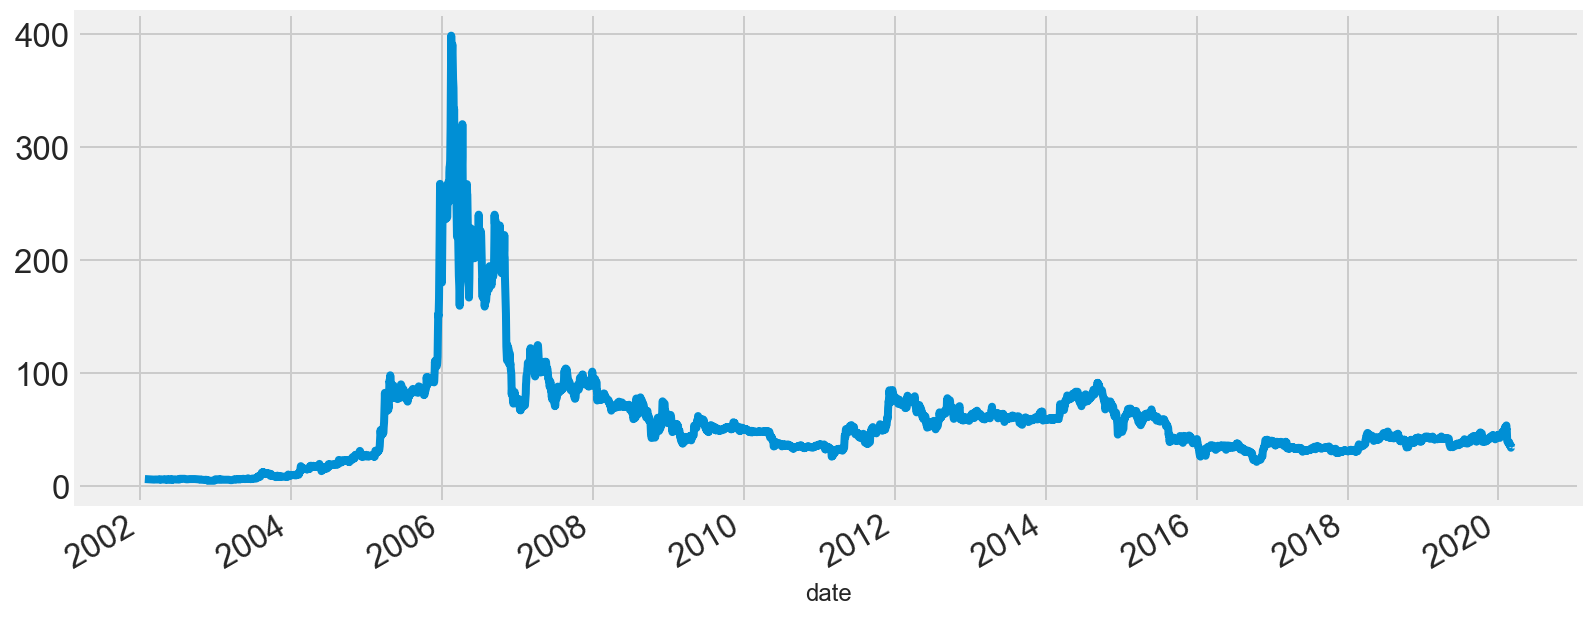

In [17]:
#Make a plot of the close price rate.
data1['close'].plot(figsize=(12, 5))
plt.show()

C:\Users\Ghida qahtan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


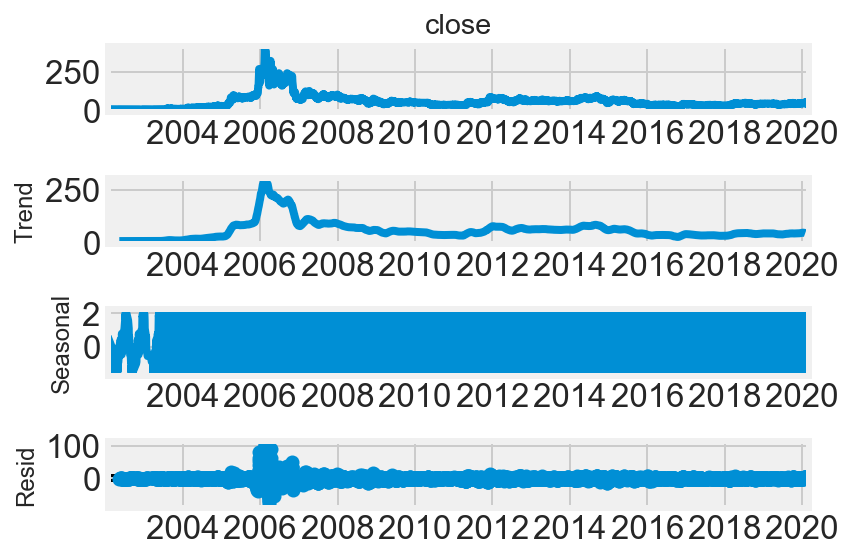

In [18]:
result = seasonal_decompose(data1['close'],freq=50)
result.plot();

# Time series models

In [19]:
#subsets trine and test
df_train = data1.loc[:'2016']
df_test = data1.loc['2017':]

In [20]:
df_test

,close
date,
2017-01-01,40.13
2017-01-02,39.92
2017-01-03,39.96
2017-01-04,39.52
2017-01-05,39.00
...,...
2020-03-01,34.55
2020-03-02,34.00
2020-03-03,35.05


In [21]:
#  range of trian's date between 
df_train.index.max(), df_train.index.min()

(Timestamp('2016-12-29 00:00:00'), Timestamp('2002-01-23 00:00:00'))

In [22]:
#  range of test's date between 
df_test.index.max(), df_test.index.min()

(Timestamp('2020-03-05 00:00:00'), Timestamp('2017-01-01 00:00:00'))

In [23]:
# size of trian and test
df_train.shape , df_test.shape

((3662, 1), (796, 1))

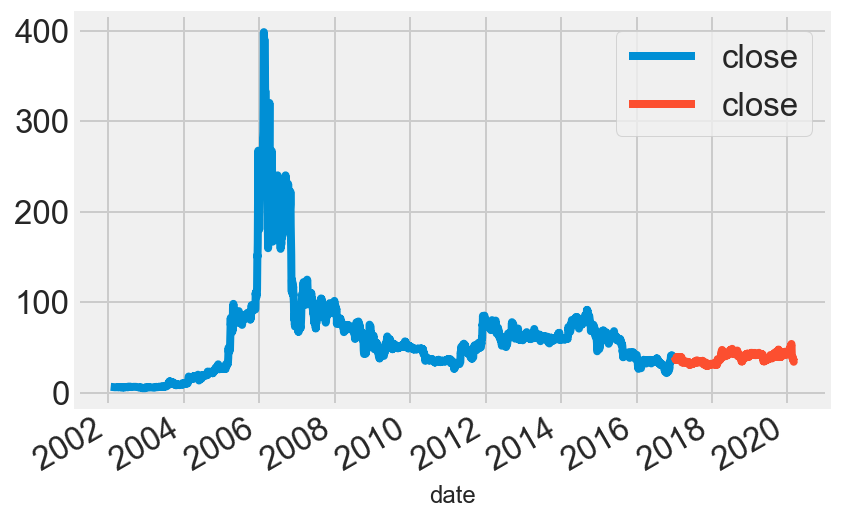

In [24]:
# Plot the train and test sets on the axis ax
fig, ax = plt.subplots()
df_train.plot(ax=ax)
df_test.plot(ax=ax)
plt.show()

In [25]:
# Check stationarity using adfuller , H0: timeserise is non-stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(data1['close'])
result
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
print(result.)    

SyntaxError: invalid syntax (<ipython-input-25-380dd6061cd8>, line 10)

In [26]:
# differenction time series to let's keep data as a variable for later

# train 
urate_train = df_train.close
udiff_train = urate_train.diff().dropna()

#test
urate_test = df_test.close
udiff_test = urate_test.diff().dropna()

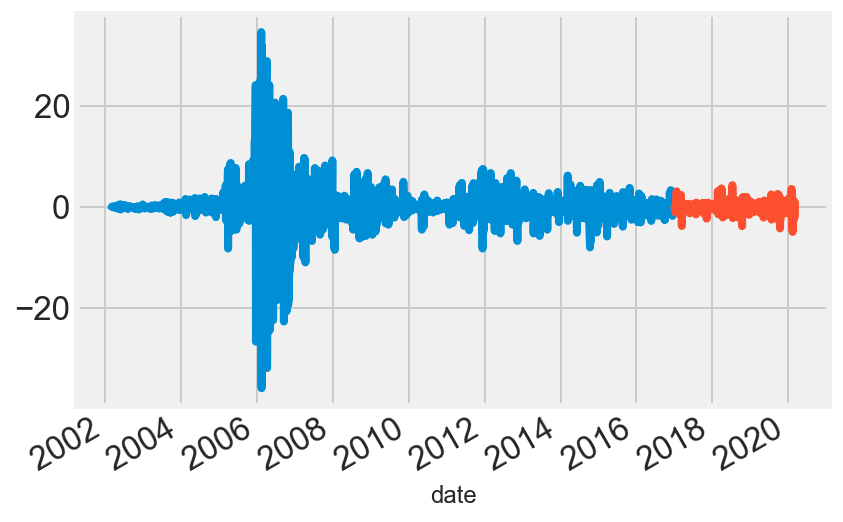

In [27]:
# Plot the differenced time series
fig, ax = plt.subplots()
udiff_train.plot(ax=ax)
udiff_test.plot(ax=ax)
plt.show()

## Fitting ARMA model

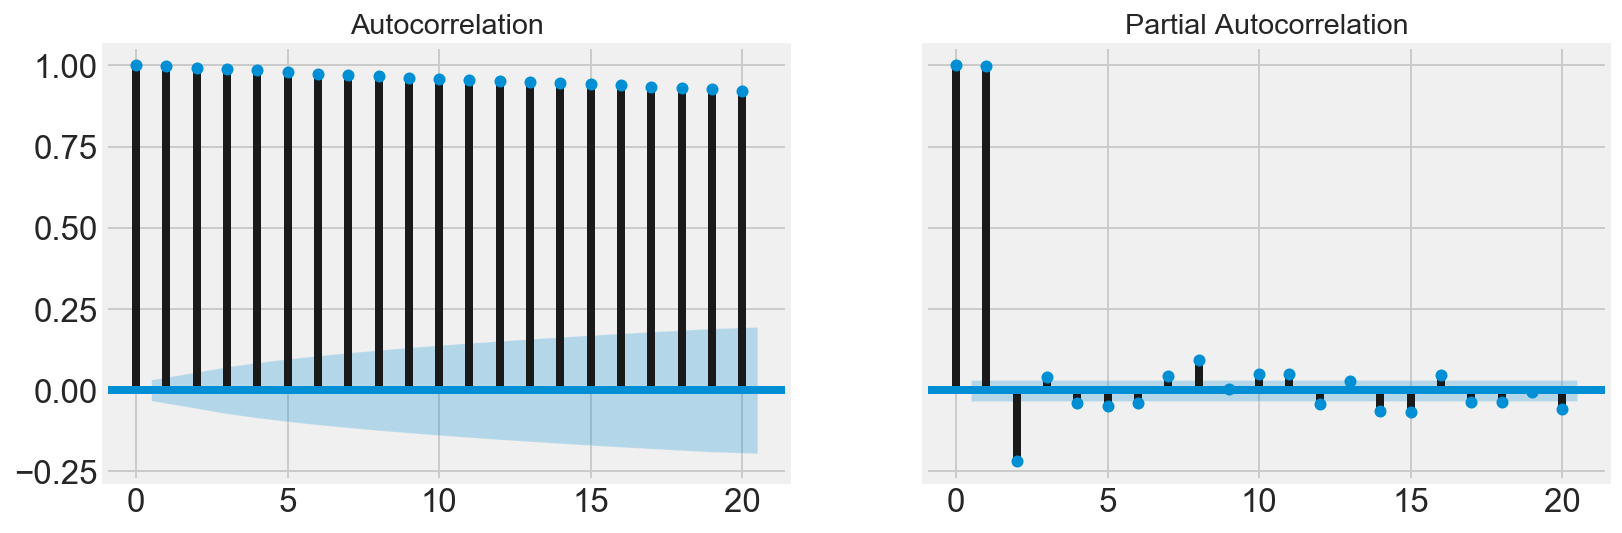

In [28]:
autocorr_plots(urate_train, lags=20);

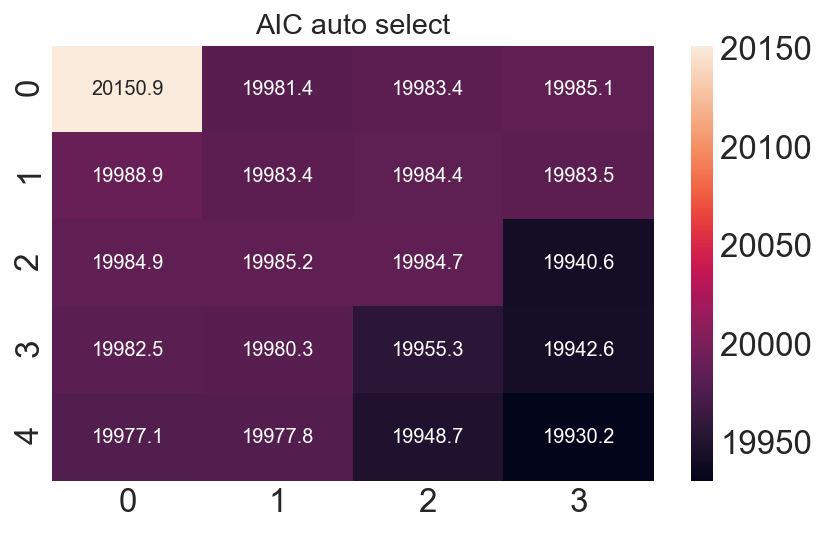

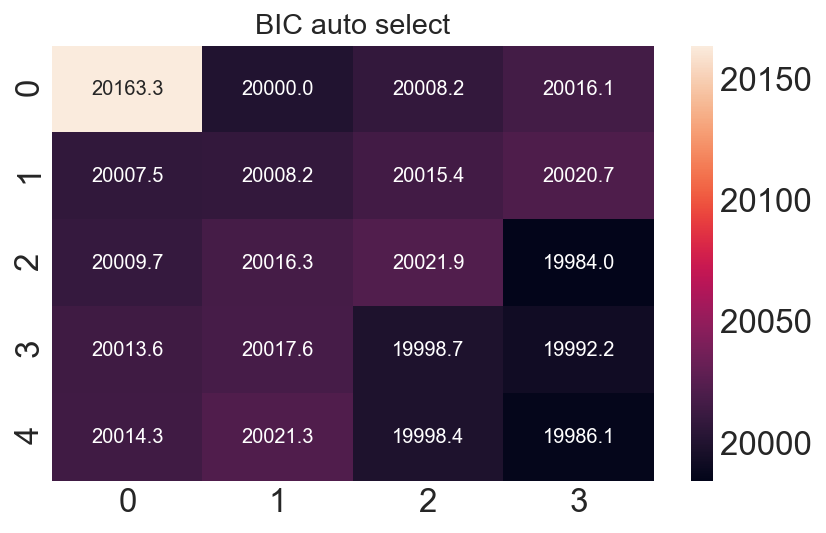

In [29]:
auto_select = stattools.arma_order_select_ic(udiff_train, max_ar=4, max_ma=3, ic=['aic', 'bic'])
# p : 1, 2, 3,4
# q : 1, 2, 3

sns.heatmap(auto_select['aic'], annot=True, fmt='.1f')
plt.title('AIC auto select')
plt.show()

sns.heatmap(auto_select['bic'], annot=True, fmt='.1f')
plt.title('BIC auto select')
plt.show()

In [44]:
model = ARMA(udiff_train,order=(4,3))
res = model.fit()
res.summary()

C:\Users\Ghida qahtan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  close   No. Observations:                 3661
Model:                     ARMA(4, 3)   Log Likelihood               -9956.105
Method:                       css-mle   S.D. of innovations              3.671
Date:                Thu, 30 Apr 2020   AIC                          19930.210
Time:                        10:40:05   BIC                          19986.059
Sample:                             0   HQIC                         19950.096
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0092      0.071      0.129      0.897      -0.130       0.148
ar.L1.close     2.0286      0.141     14.389      0.000       1.752       2.305
ar.L2.close    -1.5390      0.272     -5.649      0.000      -2.073      -1.005
ar.L3.close     0.4656      0.181      2.579      0.010       0.112       0.819
ar.L4.close    -0.1101      0.029     -3.790      0.000      -0.167      -0.053
ma.L1.close    -1.8241      0.141    -12.906      0.000      -2.101      -1.547
ma.L2.close     1.1118      0.247      4.510      0.000       0.629       1.595
ma.L3.close    -0.1065      0.136     -0.784      0.433      -0.373       0.160
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9361           -0.4392j            1.0340           -0.0698
AR.2            0.9361           +0.4392j            1.0340            0.0698
AR.3            1.1793           -2.6662j            2.9154           -0.1837
AR.4            1.1793           +2.6662j            2.9154            0.1837
MA.1            0.9356           -0.4697j            1.0469           -0.0741
MA.2            0.9356           +0.4697j            1.0469            0.0741
MA.3            8.5637           -0.0000j            8.5637           -0.0000
-----------------------------------------------------------------------------
"""

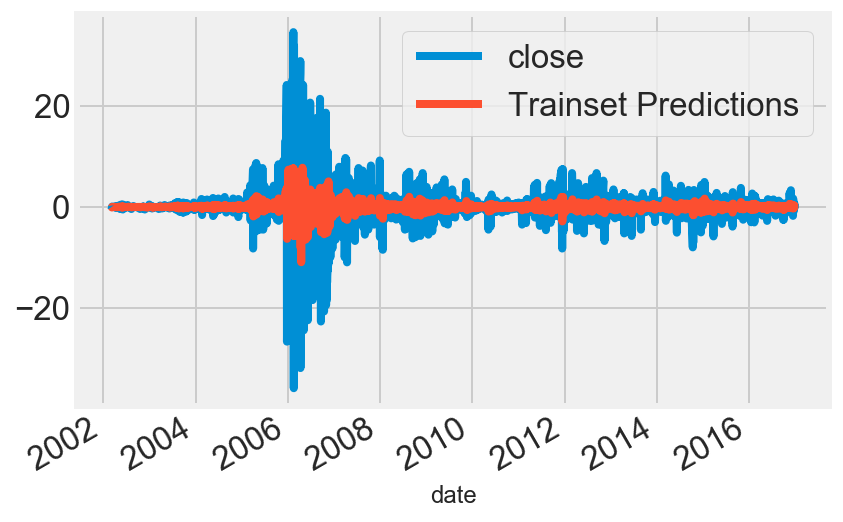

In [45]:
# plot our prediction for train data
udiff_train.plot(legend = True)
res.fittedvalues.rename("Trainset Predictions").plot(legend = True)
plt.show()

C:\Users\Ghida qahtan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


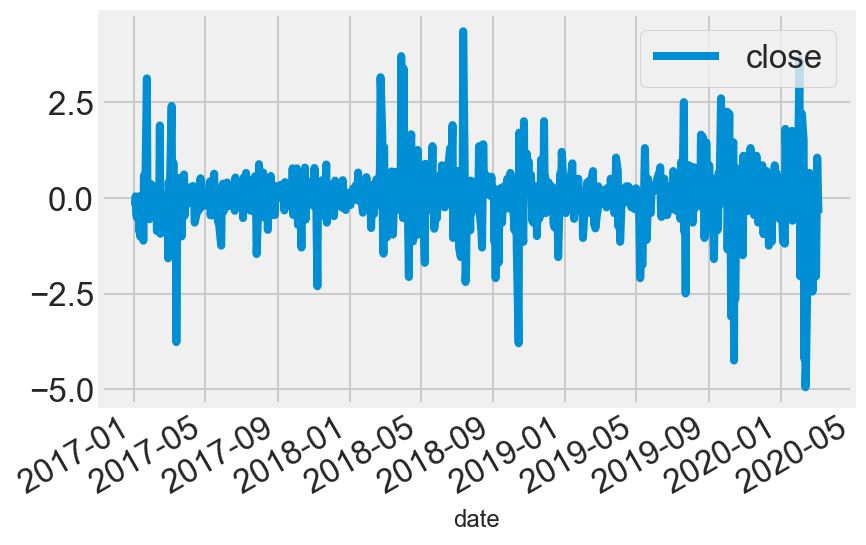

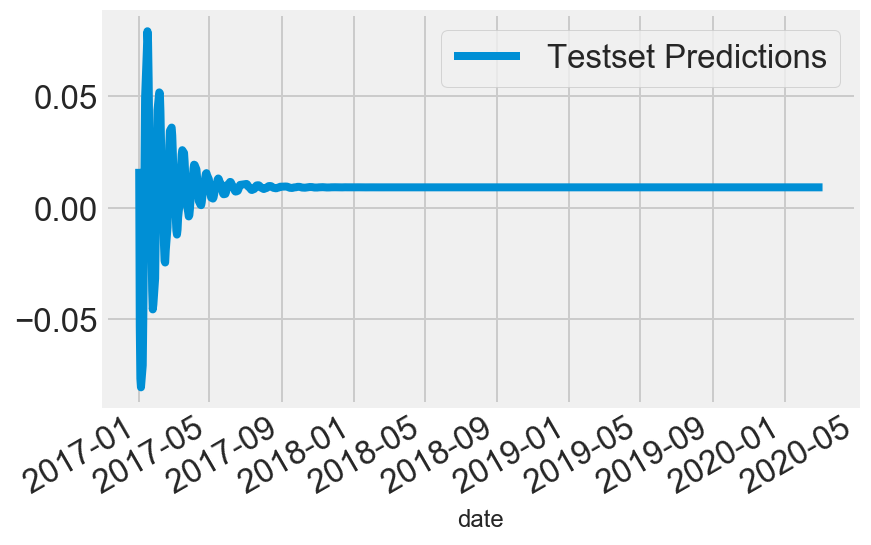

In [46]:
# plot our prediction for test data

start = len(udiff_train) 
end = len(udiff_train) + len(udiff_test) - 1
# Predictions for the test set 
predictions = res.predict(start, end).rename("Testset Predictions")

predictions=pd.DataFrame(predictions)
predictions.set_index(udiff_test.index,inplace=True) 

# plot predictions and actual values 
udiff_test.plot(legend = True);
predictions.plot(legend = True)



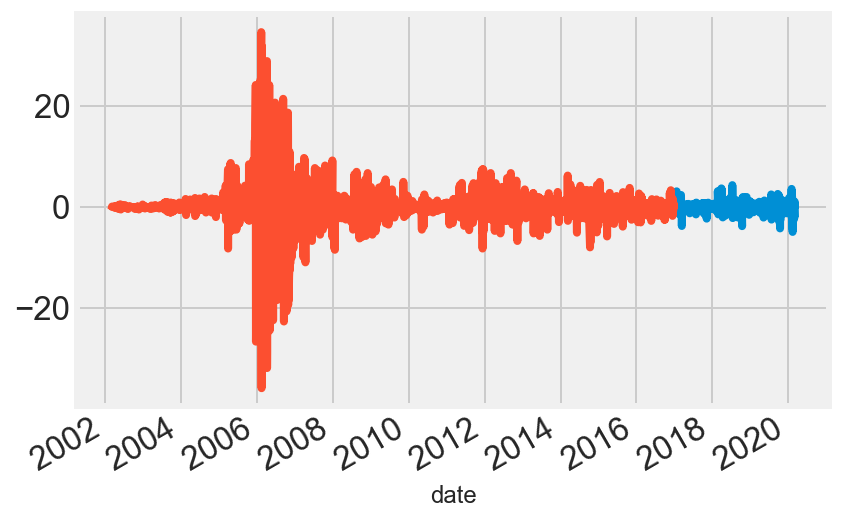

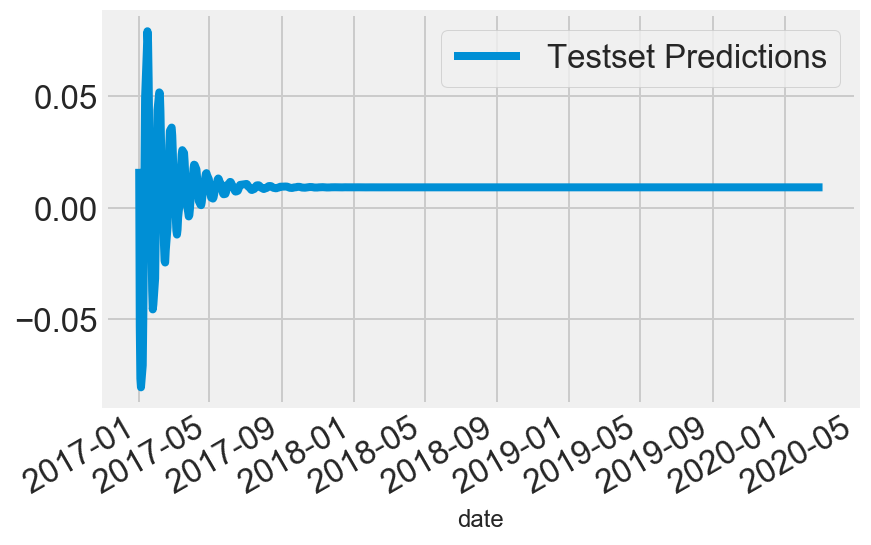

In [47]:
udiff_test.plot()
udiff_train.plot()
predictions.plot()


In [48]:
#check RMS  of model
rms = sqrt(mean_squared_error(udiff_test,predictions))
print(rms)

0.8263008383935205


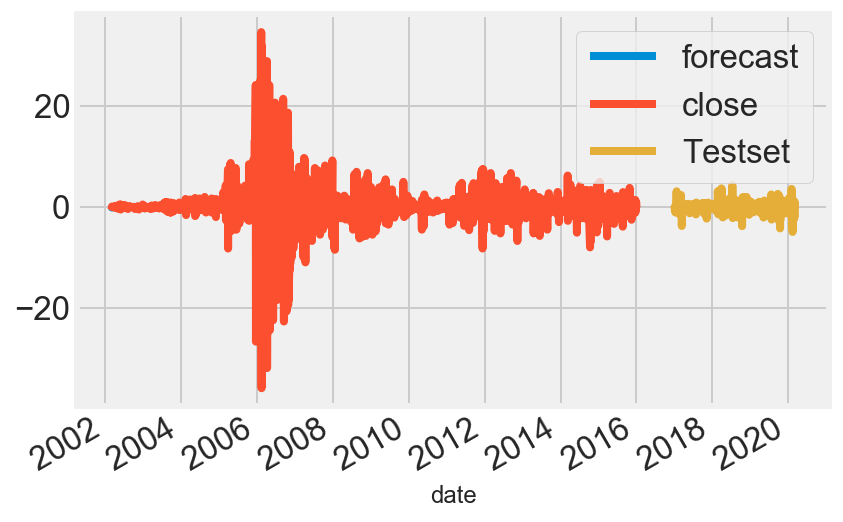

In [49]:
#plote add our test data afterprediction
fig, ax = plt.subplots()
res.plot_predict(start='2002', end='2016', ax =ax)
udiff_test.rename('Testset').plot(legend = True)
plt.show()


In [50]:
# plot original data  / blue line values
pred = res.predict(start='2002', end='2016')
pred.head()

date
2002-03-06    0.009175
2002-03-09   -0.097304
2002-03-11    0.028020
2002-03-13    0.009453
2002-03-16   -0.011774
dtype: float64

## Fitting ARIMA model

In [51]:
model = ARIMA(df_train,order=(1,1,1))
res = model.fit()
res.summary()

C:\Users\Ghida qahtan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Ghida qahtan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 3661
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9987.704
Method:                       css-mle   S.D. of innovations              3.703
Date:                Thu, 30 Apr 2020   AIC                          19983.407
Time:                        10:40:28   BIC                          20008.229
Sample:                             1   HQIC                         19992.246
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0092      0.075      0.124      0.901      -0.137       0.155
ar.L1.D.close    -0.0020      0.077     -0.026      0.979      -0.153       0.149
ma.L1.D.close     0.2210      0.075      2.946      0.003       0.074       0.368
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1         -491.1067           +0.0000j          491.1067            0.5000
MA.1           -4.5251           +0.0000j            4.5251            0.5000
-----------------------------------------------------------------------------
"""

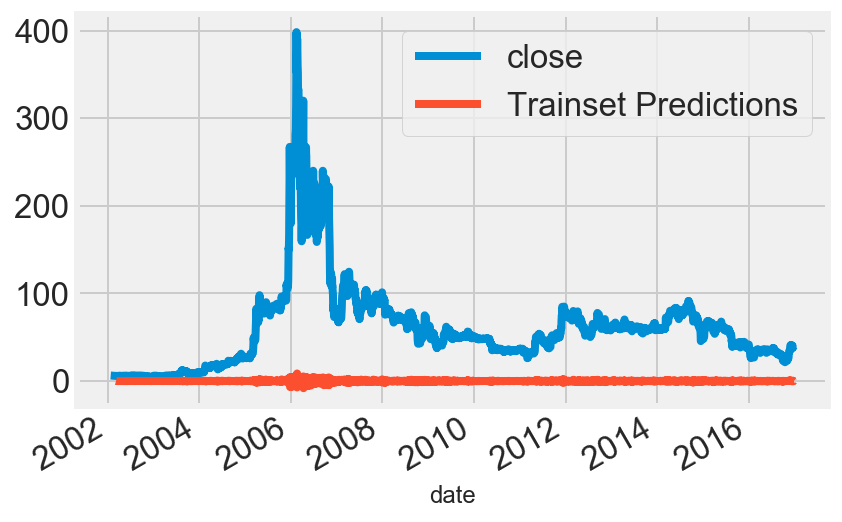

In [52]:
# plot our prediction for train data
df_train.plot(legend = True)
res.fittedvalues.rename("Trainset Predictions").plot(legend = True)
plt.show()

C:\Users\Ghida qahtan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


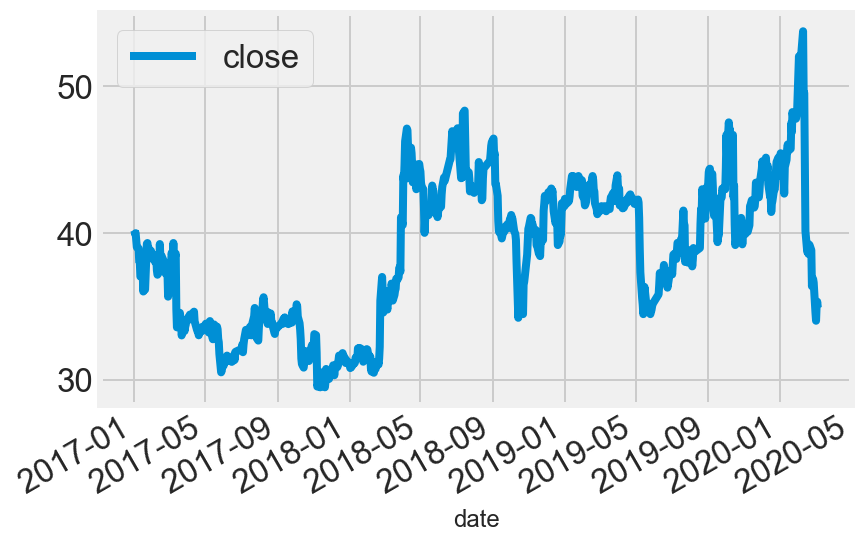

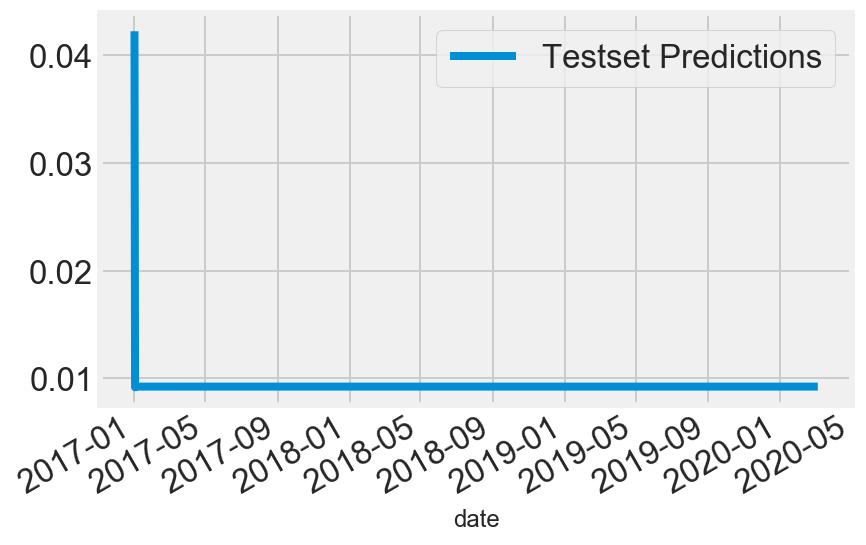

In [53]:
# plot our prediction for test data


start = len(df_train) 
end = len(df_train) + len(df_test) - 1
  
# Predictions for the test set 
predictions = res.predict(start, end).rename("Testset Predictions") 
predictions=pd.DataFrame(predictions)
predictions.set_index(df_test.index,inplace=True) 
  
# plot predictions and actual values 
df_test.plot(legend = True)
predictions.plot(legend = True) 


In [54]:
rms = sqrt(mean_squared_error(df_test,predictions))
print(rms)

38.92728689370256


In [55]:
import pmdarima as pm
model = pm.auto_arima(df_train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=19983.407, BIC=20008.229, Time=0.665 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=20150.880, BIC=20163.291, Time=0.126 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=19988.889, BIC=20007.506, Time=0.405 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=19981.408, BIC=20000.024, Time=0.412 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=20148.902, BIC=20155.108, Time=0.059 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=19983.407, BIC=20008.229, Time=0.705 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=19983.767, BIC=20014.794, Time=2.137 seconds
Total fit time: 4.593 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3662
Model:               SARIMAX(0, 1, 1)   Log Likelihood              

C:\Users\Ghida qahtan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


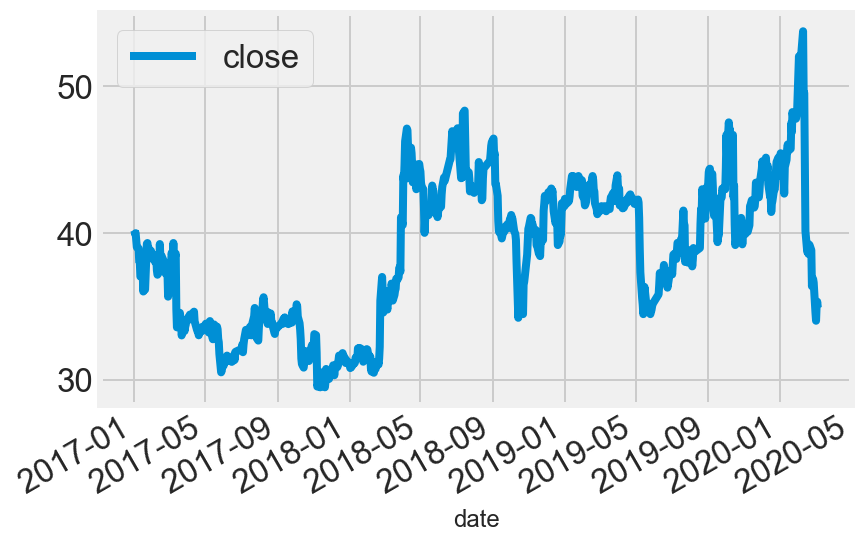

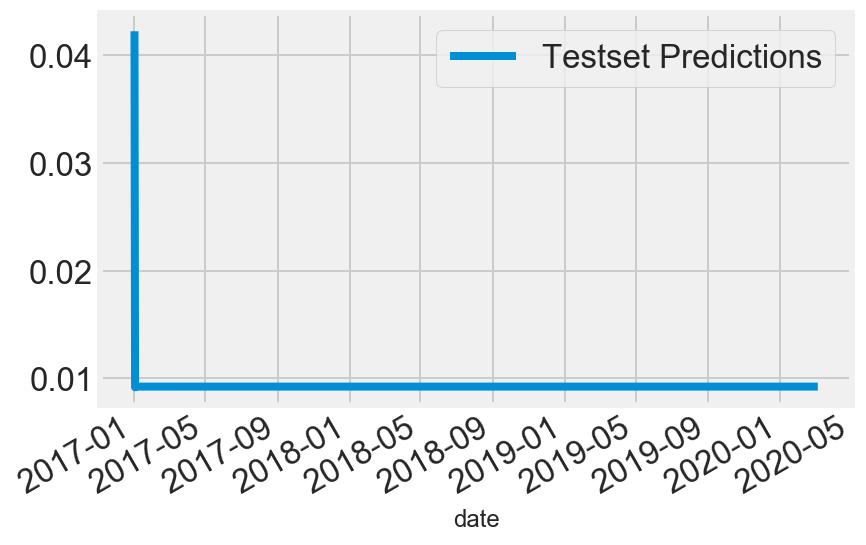

In [66]:
# plot our prediction for test data

start = len(df_train) 
end = len(df_train) + len(df_test) - 1
# Predictions for the test set 
predictions = res.predict(start, end).rename("Testset Predictions")

predictions=pd.DataFrame(predictions)
predictions.set_index(df_test.index,inplace=True) 

# plot predictions and actual values 
df_test.plot(legend = True);
predictions.plot(legend = True)



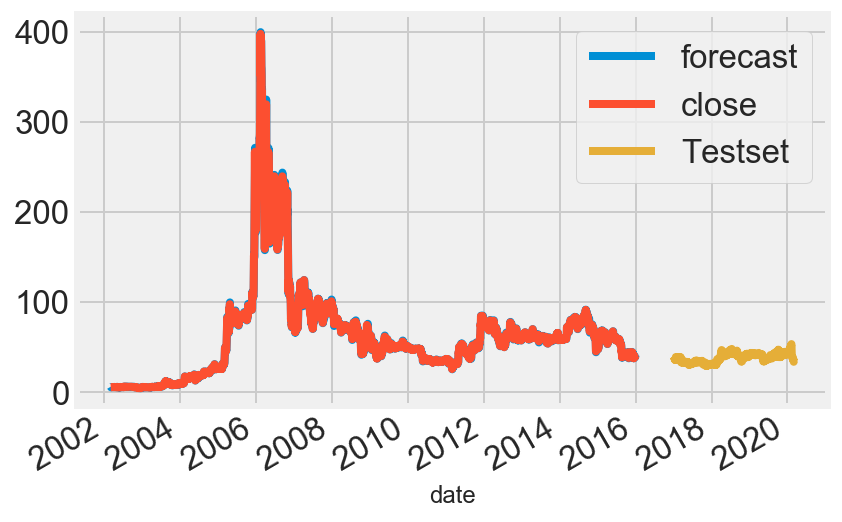

In [67]:
# train + frocast after / original data 
fig, ax = plt.subplots()
res.plot_predict(start='2002', end='2016', ax =ax)
urate_test.rename('Testset').plot(legend = True)
plt.show()


In [68]:
print(metrics.mean_squared_error(df_test,predictions))
print(metrics.mean_absolute_error(df_test,predictions))
print(np.sqrt(metrics.mean_squared_error(df_test,predictions)))

1515.333664904627
38.61120347303151
38.92728689370256


# Conclusion

Three models have been used in this analysis: ARIMA, ARMA, Auto_ARIMA.

The accuracy results of each model:

- ARIMA: 38.92
- ARMA: 0.82
- Auto_ARIMA: 38.92

Where ARIMA and Auto_ARIMA models provided the best results in terms of accuracy
